# Optimisation

Originally designed by Professor Christopher Yau, University of Manchester.

**Overview**

This practical is designed to illustrate the construction and use of numerical optimisation techniques. In this exercise you will:

1.   Understand the use of objective functions and how they are derived for simple problems,
2.   Implement a gradient descent algorithm,
3.   Implement a stochastic gradient descent algorithm.

**Pre-requisities**

This lab exercise assumes some basic programming familiarity with Python. The exercise is designed to avoid excessive use of custom libraries and tries to use as much of standard Python as possible. The exemplar code therefore is designed for readability and interpretability (rather than efficiency) to help you to learn about how the different optimisation techniques work.

## Getting Started

First, we will import some libraries that will be useful later.

In [1]:
import matplotlib.pyplot as plt # for visualisation
import random # for random number generation
import numpy as np # for numerical libraries

random.seed(242785) # seed the random number generators
np.random.seed(64254) 

### Synthesising data

We will need some data to work with. For training and model development purposes, it is often convenient to *simulate* data. This allows you full control over how the data is generated and to later understand if your model works under perfect conditions.

For this exercise, we are going to simulate data for a simple linear regression model. Here we have a input variable $X$ and an output variable $Y$. 

The relationship between $X$ and $Y$ is given by:
$$
  Y = a X + b \quad    (1)
$$
where $a$ and $b$ are model parameters (also known as *regression coefficients* in this context).

In order to simulate data, we therefore have to specify values for $a$ and $b$:

In [2]:
a_true = 2
b_true = 1

For good coding practice, we shall add the subscript `_true` to the variable names to distinguish these values as the true values used to generate the data as supposed to the *inferred* values we will estimate later from data.

Next, we will need some $X$ values. Lets generate $n=30$ of these values uniformly spaced between 0 and 1 using the `linspace` function from the numpy library:

In [3]:
n = 30
x = np.linspace(0, 1, num=n)

Now, we need to calculate the $Y$-values according to our given relationship (equation 1):

In [4]:
y_true = a_true*x + b_true

Lets plot this:

Text(0, 0.5, 'y')

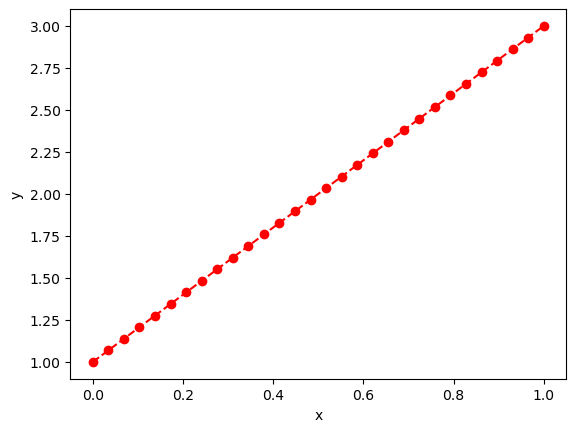

In [5]:
plt.plot(x, y_true, linestyle='--', marker='o', color='r')
plt.xlabel("x")
plt.ylabel("y")

You should see a straight line with slope given by $a$ and intercept on the vertical axis by $b$.

Now, this data is so far not very realistic, there is no noise that is normally associated with real-world measurements. We can add the noise by simulating random variables from a Normal distribution. Here, we can use the numpy random number generator (`np.random.normal`): 

In [6]:
sigma2_true = 0.2 # noise variance
e = np.random.normal(loc=0.0, scale=np.sqrt(sigma2_true), size=n)

A normal distribution has two parameters, the mean (`loc`) of the distribution and its standard deviation (`scale`). Instead of using standard deviation, we specify the variance of the noise instead (which is the standard deviation squared) so we have to square-root it before using it as input into `np.random.normal`. 

Random number generators in different software libraries sometimes use variance and sometimes they use standard deviation.

Now, lets add the noise we have generated to the true $Y$-values:

In [7]:
y = y_true + e

Now lets plot the noisy $(X, Y)$ values over the true ones:

Text(0, 0.5, 'y')

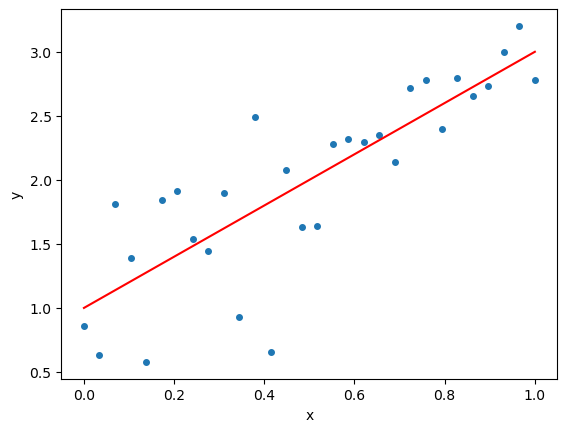

In [8]:
plt.scatter(x, y, s=16)
plt.plot(x, y_true, 'r')
plt.xlabel("x")
plt.ylabel("y")

Now we have simulated noisy data for a system where there is a underlying true linear relationship between $X$ and $Y$. 

## Learning

We now have (simulated) data contained in the variables $(X, Y)$. In a real-world setting, we might plot this data to try to understand feasible relationships between the model (which we have done already above).

Given this visualisation we might hypothesis that the relationship $Y = aX + b$ applies (in fact, we know this is the actual true model but we wouldn't for a real problem). 

Now, the **inference problem** is to identify the parameters $(a, b)$ that make our model most consistent with the data.

### Loss function

To identify the best data-fitting parameters, we need to define a **loss function** which tells us, for any given set of parameters, how well the model fits the data. What is a suitable loss function?

Given a dataset $D = \{ (x_1, y_1), \dots, (x_n, y_n) \}$, one approach is to construct a loss function based on the error between the real measured value of $Y$ and the one predicted by the model $\hat{Y}$ based on parameters $\theta = \{a,b\}$.

The loss function sums over all the errors across the $n$ data points:
$$
  L(\theta) = \sum_{i=1}^n ( Y_i - \hat{Y}_i )^2
$$
where the prediction is given by $\hat{Y_i} = aX_i+b$. 

We square each error term to ensure that each data point contributes a strictly positive-value to the total loss.


In [9]:
def loss_fn(a, b, x, y):
  y_hat = a*x + b # generate prediction of Y based on X and parameters (a, b)
  L = np.sum( (y- y_hat)**2 ) # compute total loss
  return L # return loss

### Optimisation

The goal is to find parameters that *minimise* the total loss:
$$
  \hat{\theta} = \arg \min_{\theta} L(\theta)
$$

We will use **gradient descent** to find the parameters that minimise the loss function:

$$
  \theta' \leftarrow \theta - \lambda \nabla L(\theta)
$$



In [10]:
n_its = 30 # number of optimisation steps
lam = 0.01 # step size

a = 1 # initial value for a
b = -1 # initial value for b

# set up some arrays to store output from each step of the optimisation process
loss_values = np.zeros(n_its)
a_values = np.zeros(n_its)
b_values = np.zeros(n_its)

# iterate 
for it in range(n_its):

  y_hat = a*x + b # get predicted values for y based on the current parameter values for (a,b)
  
  dlda = np.sum( -2*(y-y_hat)*(x) ) # compute the derivative of the loss function with respect to a, dL/da
  dldb = np.sum( -2*(y-y_hat)*(1) ) # compute the derivative of the loss function with respect to b, dL/db

  a = a - lam*dlda # update a via gradient descent
  b = b - lam*dldb # update b via gradient descent

  loss_values[it] = loss_fn(a, b, x, y) # compute loss function at current parameters
  a_values[it] = a # store current a value
  b_values[it] = b # store current b value

### Assessing convergence

It is good practice to plot the loss values after you have run the optimisation procedure. This is to check that the algorithm has truly *converged* to the minimum of the loss function. Further, the values of the parameters being estimated should also converge. This can be helpful for identifying bugs in code too. 

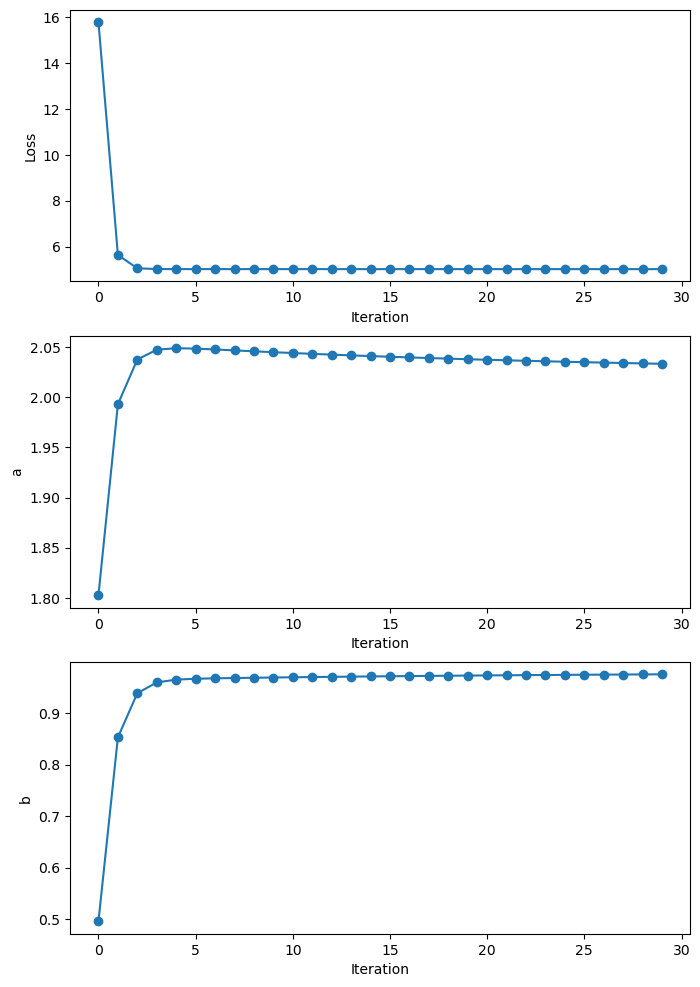

In [11]:
# set up a multiple plot figure (3 rows, 1 column) with three plotting axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# plot the loss values
ax1.plot(loss_values, 'o-')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')

# plot the a values
ax2.plot(a_values, 'o-')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('a')

# plot the b values
ax3.plot(b_values, 'o-')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('b')
plt.show()

### Stochastic Gradient Descent

Now lets repeat the exercise with stochastic gradient descent (SGD).

With SGD instead of computing the entire gradient term which requires evaluating all $n$ data points, we choose a small batch of data points and use this subset to estimate the gradient. For the special case when the batch size is one, the procedure is sometimes known as **online SGD** because only one data point need be held in computer memory at any time.

In [12]:
n_its = 3000
lam = 0.01
a = 1
b = -1

loss_values = np.zeros(n_its)
a_values = np.zeros(n_its)
b_values = np.zeros(n_its)

The main difference is that at each step of our optimisation procedure we now randomly sample a data pair $(X_j, Y_j)$ which we use to estimate the gradient rather than all $n$ samples.

In [13]:
for it in range(n_its):

  # sample one random data pair (x, y)
  j = np.random.random_integers(0, n-1)
  xj = x[j]
  yj = y[j]
  yj_hat = a*xj + b 
  
  dlda = np.sum( -2*(yj-yj_hat)*(xj) )
  dldb = np.sum( -2*(yj-yj_hat)*(1) )
  a = a - lam*n*dlda # multiply by n to get estimate of gradient
  b = b - lam*n*dldb # multiply by n to get estimate of gradient

  loss_values[it] = loss_fn(a, b, x, y)
  a_values[it] = a
  b_values[it] = b

/tmp/ipykernel_490042/4097950968.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 29 + 1) instead
  j = np.random.random_integers(0, n-1)


The result is an $n$-fold reduction in compute time per iteration but because the gradients are only estimated the overall procedure is *noisy*. On average, we are minimising the loss but there is some variation.

This shows that while SGD benefits from reduced compute and memory requirements since one does not need to compute gradients from all data points, we may need a larger number of optimisation steps to identify the minimum of the loss function and the overall procedure is more unstable.

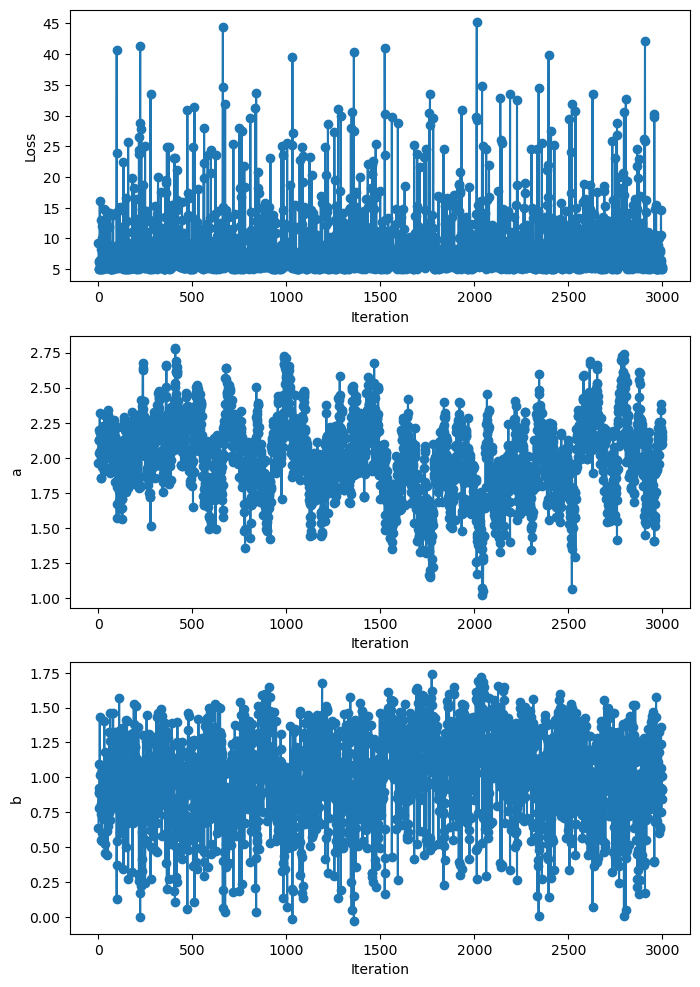

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
#fig.suptitle('A tale of 2 subplots')

ax1.plot(loss_values, 'o-')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')

ax2.plot(a_values, 'o-')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('a')

ax3.plot(b_values, 'o-')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('b')
plt.show()

Study the effect of changing the total number of optimisation steps and the size of the step size $\lambda$. What do you observe?